## Descargue las bases de datos

In [1]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [2]:
# prompt: Importe las liberrias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')


Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [3]:
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [ ]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


In [7]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]
games_df['season_year'] = games_df['season_id'].astype(str).str[1:].astype(int)

games_filtered_seasons = games_df[(games_df['season_year'] >= 1984) & (games_df['season_year'] <= 2003)]

print(games_filtered_seasons.head())

      season_id  team_id_home team_abbreviation_home         team_name_home  \
18174     21984    1610612765                    DET        Detroit Pistons   
18175     21984    1610612744                    GOS  Golden State Warriors   
18176     21984    1610612751                    NJN        New Jersey Nets   
18177     21984    1610612760                    SEA    Seattle SuperSonics   
18178     21984    1610612741                    CHI          Chicago Bulls   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
18174  28400003  1984-10-26 00:00:00  DET vs. BOS       L  240      48.0  ...   
18175  28400006  1984-10-26 00:00:00  GOS vs. PHX       L  240      42.0  ...   
18176  28400004  1984-10-26 00:00:00  NJN vs. ATL       L  240      40.0  ...   
18177  28400001  1984-10-26 00:00:00  SEA vs. UTH       W  240      36.0  ...   
18178  28400005  1984-10-26 00:00:00  CHI vs. WAS       W  240      48.0  ...   

       ast_away  stl_away  blk_away  t

Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [ ]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


In [8]:
games_playoffs_df = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']

print(games_playoffs_df)

      season_id  team_id_home team_abbreviation_home      team_name_home  \
19117     41984    1610612755                    PHL  Philadelphia 76ers   
19118     41984    1610612742                    DAL    Dallas Mavericks   
19119     41984    1610612747                    LAL  Los Angeles Lakers   
19120     41984    1610612743                    DEN      Denver Nuggets   
19121     41984    1610612765                    DET     Detroit Pistons   
...         ...           ...                    ...                 ...   
41038     42003    1610612747                    LAL  Los Angeles Lakers   
41039     42003    1610612747                    LAL  Los Angeles Lakers   
41040     42003    1610612765                    DET     Detroit Pistons   
41041     42003    1610612765                    DET     Detroit Pistons   
41042     42003    1610612765                    DET     Detroit Pistons   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
19117 

Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas


In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas

# Ahora unimos con las estadísticas de partidos para agregar el rendimiento en los juegos

# Mostrar las primeras filas de la unión


In [9]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='inner')

print(players_combined.head())

   person_id first_name_x last_name_x display_first_last  \
0    1630173     Precious     Achiuwa   Precious Achiuwa   
1     101165         Alex       Acker         Alex Acker   
2     203112       Quincy         Acy         Quincy Acy   
3     203919       Jordan       Adams       Jordan Adams   
4     203500       Steven       Adams       Steven Adams   

  display_last_comma_first display_fi_last       player_slug  \
0        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
1              Acker, Alex        A. Acker        alex-acker   
2              Acy, Quincy          Q. Acy        quincy-acy   
3            Adams, Jordan        J. Adams      jordan-adams   
4            Adams, Steven        S. Adams      steven-adams   

             birthdate      school      country  ... spot_nba_break_right  \
0  1999-09-19 00:00:00     Memphis      Nigeria  ...                  NaN   
1  1983-01-21 00:00:00  Pepperdine          USA  ...                  NaN   
2  1990-10-06 00:00:00 

In [10]:
player_game_stats = pd.merge(players_combined, games_playoffs_df, left_on='team_id', right_on='team_id_home', how='inner')

print(player_game_stats.head())

   person_id first_name_x last_name_x display_first_last  \
0    1630173     Precious     Achiuwa   Precious Achiuwa   
1    1630173     Precious     Achiuwa   Precious Achiuwa   
2    1630173     Precious     Achiuwa   Precious Achiuwa   
3    1630173     Precious     Achiuwa   Precious Achiuwa   
4    1630173     Precious     Achiuwa   Precious Achiuwa   

  display_last_comma_first display_fi_last       player_slug  \
0        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
1        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
2        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
3        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
4        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   

             birthdate   school  country  ... ast_away stl_away  blk_away  \
0  1999-09-19 00:00:00  Memphis  Nigeria  ...     13.0      5.0       3.0   
1  1999-09-19 00:00:00  Memphis  Nigeria  ...     17.0      6.0       4.0   
2  1999-09-19 00:00:00 

##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [ ]:
# Contar el número de equipos únicos que han participado en los Playoffs


In [11]:
unique_teams_playoffs = games_playoffs_df['team_name_home'].nunique()
print(f"Número de equipos únicos en los Playoffs (1984-2003): {unique_teams_playoffs}")

Número de equipos únicos en los Playoffs (1984-2003): 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [ ]:
# Contar el número de jugadores únicos que han participado


In [12]:
unique_players_playoffs = player_game_stats['person_id'].nunique()
print(f"Número de jugadores únicos en los Playoffs (1984-2003): {unique_players_playoffs}")

Número de jugadores únicos en los Playoffs (1984-2003): 518


* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

In [ ]:
# Contar el número de jugadores únicos por equipo

# Mostrar el resultado

# Gráfica del número de jugadores por equipo



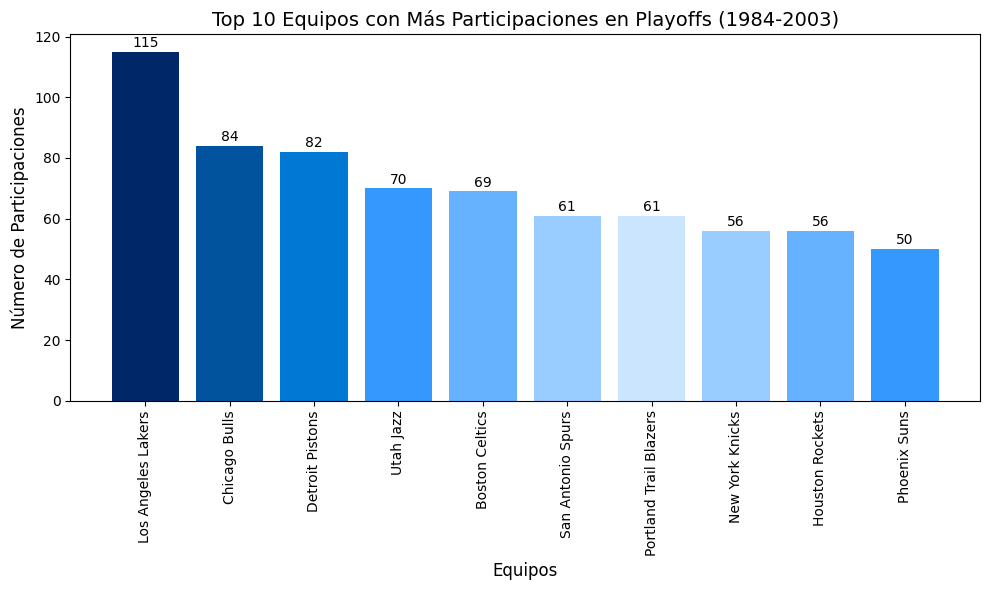

In [13]:
team_counts = games_playoffs_df['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['#002868', '#00539C', '#0078D4', '#3399FF', '#66B2FF', '#99CCFF','#CCE5FF','#99CCFF','#66B2FF','#3399FF'])
plt.xlabel('Equipos', fontsize=12)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Top 10 Equipos con Más Participaciones en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')


plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [ ]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado



In [14]:
team_points = games_playoffs_df.groupby('team_name_home')['pts_home'].sum()

team_points_sorted = team_points.sort_values(ascending=False)

team_points_sorted

,pts_home
team_name_home,
Los Angeles Lakers,12554.0
Chicago Bulls,8392.0
Detroit Pistons,8127.0
Boston Celtics,7702.0
Utah Jazz,7025.0
Portland Trail Blazers,6496.0
San Antonio Spurs,5965.0
Houston Rockets,5806.0
Phoenix Suns,5435.0


* haga un grafico de barras en azul con estos resultados

In [ ]:
# Gráfica de los equipos con más puntos anotados


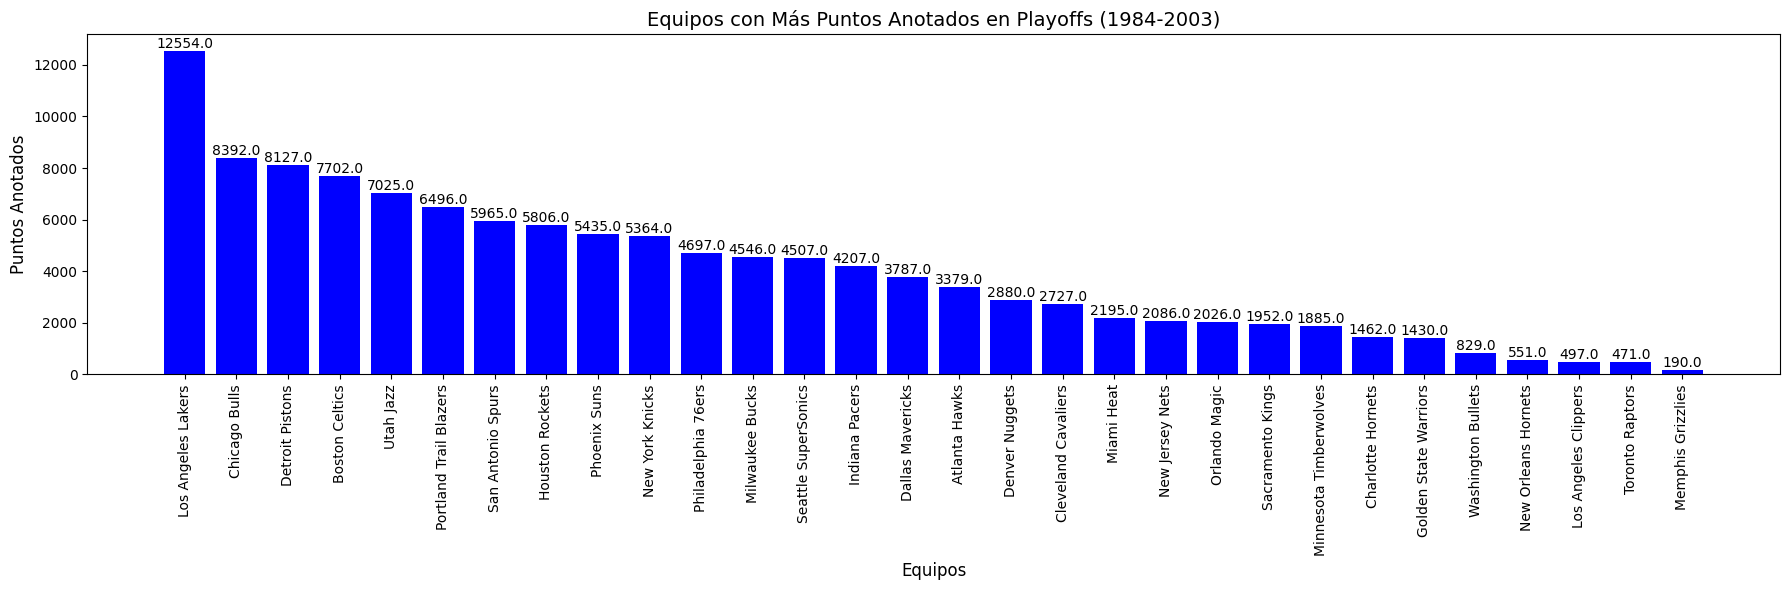

In [42]:
plt.figure(figsize=(18, 6))
bars = plt.bar(team_points_sorted.index, team_points_sorted.values, color='blue')
plt.xlabel('Equipos', fontsize=12)
plt.ylabel('Puntos Anotados', fontsize=12)
plt.title('Equipos con Más Puntos Anotados en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [ ]:
# Calcular el promedio de puntos por equipo en casa

# Mostrar los equipos con mejor promedio de puntos en casa


In [16]:
home_team_avg_points = games_playoffs_df.groupby('team_name_home')['pts_home'].mean()

print("Equipos con mejor promedio de puntos en casa:")
print(home_team_avg_points.sort_values(ascending=False))

Equipos con mejor promedio de puntos en casa:
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Washington Bullets        103.625000
Sacramento Kings          102.736842
Philadelphia 76ers        102.108696
Orlando Magic             101.300000
Cleveland Cavaliers       101.000000
Utah Jazz                 100.357143
Chicago Bulls              99.904762
Los Angeles Clippers       99.400000
Atlanta Hawks              99.382353
Detroit Pistons            99.109756
San Antonio Spurs          97.786885
Charlotte Hornets          97.466667
New York Knicks            95.785714
Indiana Pacers             95.613636
Memphis Grizzlies          95.000000
New Jersey Net

Hga un grafico en naranja de estos resultados

In [ ]:
# Gráfica del promedio de puntos en casa por equipo


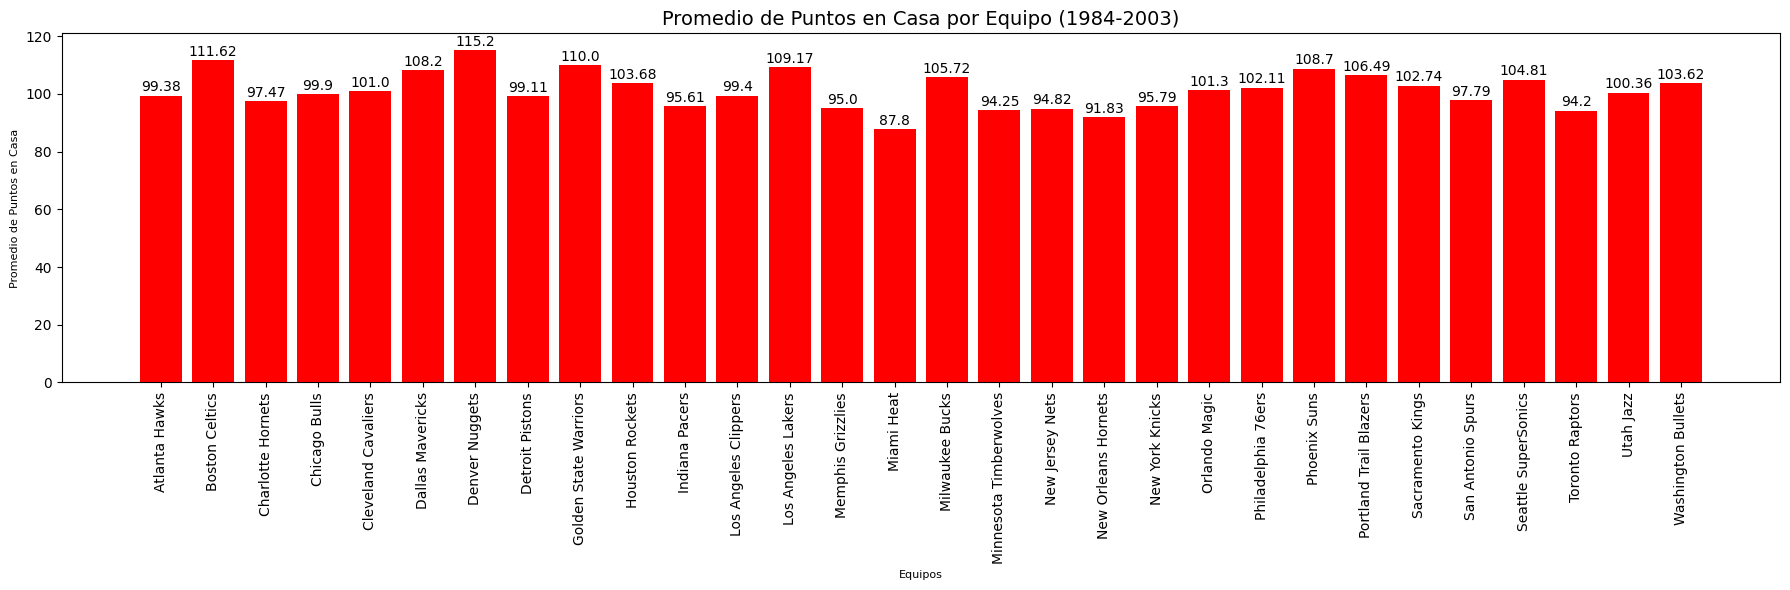

In [40]:
plt.figure(figsize=(18, 6))
bars = plt.bar(home_team_avg_points.index, home_team_avg_points.values, color='Red')
plt.xlabel('Equipos', fontsize=8)
plt.ylabel('Promedio de Puntos en Casa', fontsize=8)
plt.title('Promedio de Puntos en Casa por Equipo (1984-2003)', fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval,2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [ ]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


           pts_home  pts_away  total_points
season_id                                  
42002        8609.0    8291.0       16900.0
41987        8551.0    8140.0       16691.0
41986        8040.0    7638.0       15678.0
41984        8014.0    7584.0       15598.0
41989        7840.0    7355.0       15195.0
41992        7771.0    7356.0       15127.0
41991        7775.0    7300.0       15075.0
41985        7744.0    7313.0       15057.0
41994        7384.0    7108.0       14492.0
42003        7489.0    6948.0       14437.0
41990        7174.0    6991.0       14165.0
41996        6958.0    6581.0       13539.0
42000        6752.0    6541.0       13293.0
41988        6574.0    6429.0       13003.0
41997        6620.0    6335.0       12955.0
41998        5875.0    5691.0       11566.0


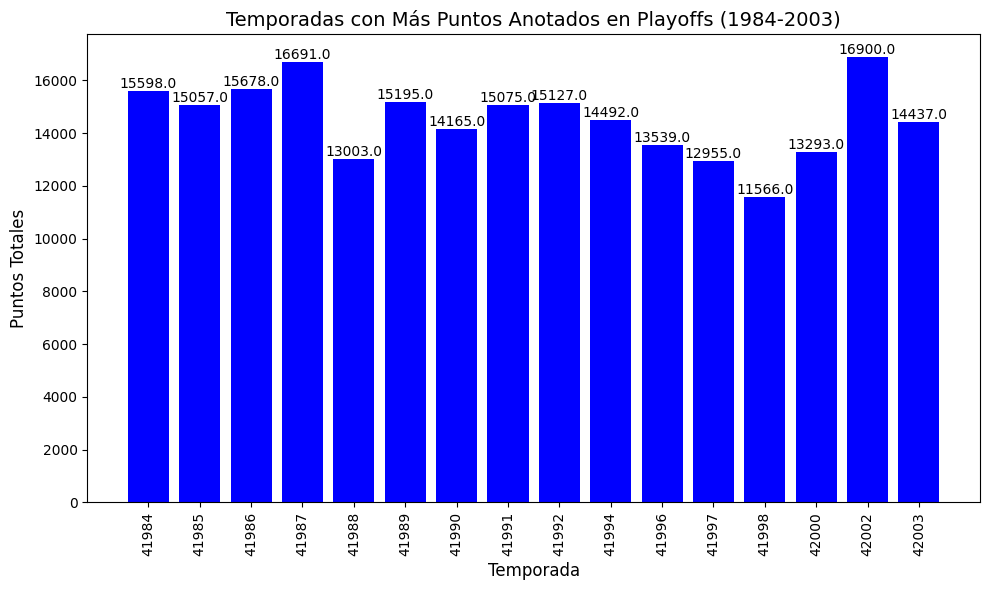

In [33]:
season_total_points = games_playoffs_df.groupby('season_id')[['pts_home', 'pts_away']].sum()
season_total_points['total_points'] = season_total_points['pts_home'] + season_total_points['pts_away']

print(season_total_points.sort_values('total_points', ascending=False))

plt.figure(figsize=(10, 6))
bars = plt.bar(season_total_points.index, season_total_points['total_points'], color='blue')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Puntos Totales', fontsize=12)
plt.title('Temporadas con Más Puntos Anotados en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

* Cree una serie de tiempo con esto:

In [ ]:
# Gráfica de las temporadas con más puntos


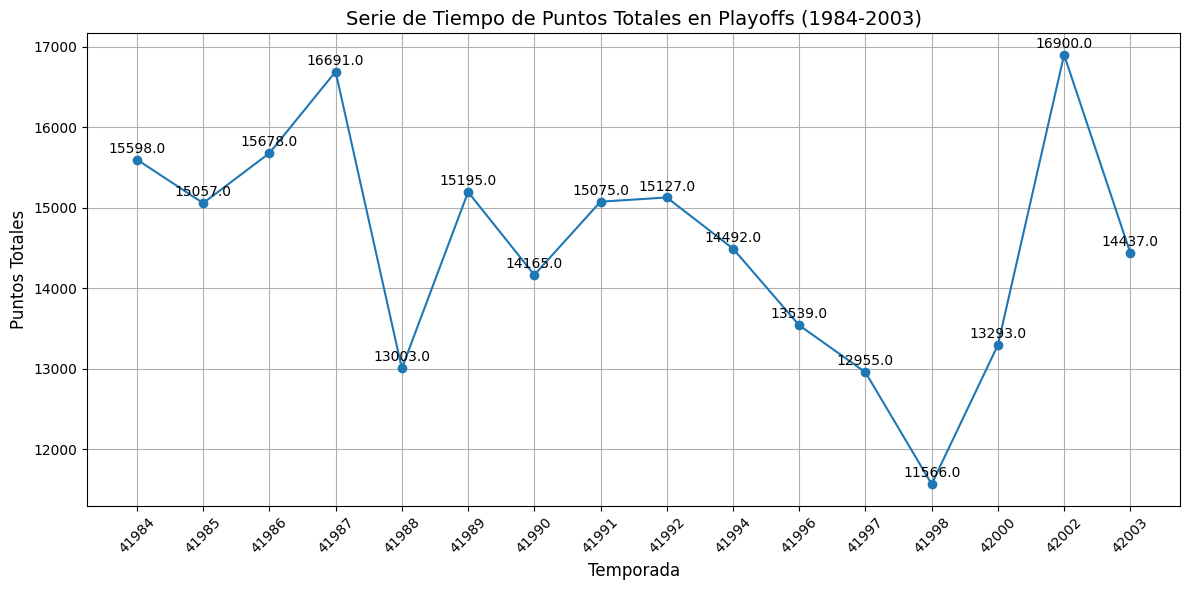

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(season_total_points.index, season_total_points['total_points'], marker='o', linestyle='-')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Puntos Totales', fontsize=12)
plt.title('Serie de Tiempo de Puntos Totales en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, txt in enumerate(season_total_points['total_points']):
    plt.annotate(txt, (season_total_points.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')


plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta graficaa

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [ ]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table


In [20]:
pivot_table = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home'], columns=['position_y'], aggfunc='mean')
pivot_table


ast_home                                              \
position_y                      C       C-PF         PF       PF-C      PF-SF   
team_name_home                                                                  
Atlanta Hawks           22.882353        NaN  22.882353        NaN  22.882353   
Boston Celtics          26.811594        NaN  26.811594        NaN  26.811594   
Charlotte Hornets       22.866667  22.866667  22.866667        NaN  22.866667   
Chicago Bulls           24.547619        NaN  24.547619  24.547619        NaN   
Cleveland Cavaliers     26.629630  26.629630  26.629630        NaN        NaN   
Dallas Mavericks              NaN        NaN  23.285714        NaN        NaN   
Denver Nuggets          24.880000        NaN  24.880000  24.880000        NaN   
Detroit Pistons         21.060976        NaN  21.060976        NaN  21.060976   
Golden State Warriors         NaN  21.384615  21.384615  21.384615  21.384615   
Houston Rockets         25.035714  25.035714  25.035714        NaN        NaN   
Indiana Pacers                NaN  20.522727  20.522727  20.522727        NaN   
Los Angeles Clippers    23.600000  23.600000  23.600000        NaN        NaN   
Los Angeles Lakers            NaN        NaN  27.243478  27.243478        NaN   
Memphis Grizzlies       17.500000  17.500000  17.500000  17.500000        NaN   
Miami Heat              17.320000  17.320000  17.320000  17.320000        NaN   
Milwaukee Bucks         24.674419  24.674419  24.674419        NaN        NaN   
Minnesota Timberwolves  21.400000  21.400000  21.400000  21.400000        NaN   
New Jersey Nets         23.090909        NaN  23.090909  23.090909        NaN   
New Orleans Hornets           NaN        NaN  22.833333        NaN        NaN   
New York Knicks         22.625000        NaN  22.625000        NaN        NaN   
Orlando Magic           21.450000  21.450000  21.450000        NaN        NaN   
Philadelphia 76ers      22.521739  22.521739  22.521739        NaN  22.521739   
Phoenix Suns                  NaN        NaN  25.000000  25.000000        NaN   
Portland Trail Blazers  24.065574        NaN  24.065574  24.065574        NaN   
Sacramento Kings        22.736842        NaN  22.736842  22.736842        NaN   
San Antonio Spurs       22.688525        NaN  22.688525  22.688525        NaN   
Seattle SuperSonics     22.813953        NaN  22.813953        NaN  22.813953   
Toronto Raptors         21.800000        NaN  21.800000  21.800000        NaN   
Utah Jazz               23.042857  23.042857  23.042857  23.042857  23.042857   
Washington Bullets      18.000000  18.000000  18.000000  18.000000        NaN   

                                                                               \
position_y                     PG      PG-SG         SF      SF-PF      SF-SG   
team_name_home                                                                  
Atlanta Hawks           22.882353        NaN  22.882353        NaN        NaN   
Boston Celtics          26.811594  26.811594  26.811594        NaN        NaN   
Charlotte Hornets       22.866667  22.866667  22.866667  22.866667  22.866667   
Chicago Bulls           24.547619  24.547619  24.547619        NaN        NaN   
Cleveland Cavaliers     26.629630        NaN  26.629630  26.629630  26.629630   
Dallas Mavericks        23.285714        NaN        NaN        NaN        NaN   
Denver Nuggets          24.880000        NaN  24.880000        NaN        NaN   
Detroit Pistons         21.060976  21.060976  21.060976  21.060976        NaN   
Golden State Warriors   21.384615  21.384615  21.384615        NaN  21.384615   
Houston Rockets         25.035714        NaN  25.035714  25.035714  25.035714   
Indiana Pacers          20.522727  20.522727  20.522727  20.522727        NaN   
Los Angeles Clippers          NaN        NaN  23.600000  23.600000        NaN   
Los Angeles Lakers      27.243478  27.243478  27.243478        NaN  27.243478   
Memphis Grizzlies       17.500000        NaN  17.500000

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [ ]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados


                         ast_home                          pts_home  \
role                          Ala       Base     Pivote         Ala   
team_name_home                                                        
Atlanta Hawks           22.882353  22.882353  22.882353   99.382353   
Boston Celtics          26.811594  26.811594  26.811594  111.623188   
Charlotte Hornets       22.866667  22.866667  22.866667   97.466667   
Chicago Bulls           24.547619  24.547619  24.547619   99.904762   
Cleveland Cavaliers     26.629630  26.629630  26.629630  101.000000   
Dallas Mavericks              NaN  23.285714  23.285714         NaN   
Denver Nuggets          24.880000  24.880000  24.880000  115.200000   
Detroit Pistons         21.060976  21.060976  21.060976   99.109756   
Golden State Warriors   21.384615  21.384615  21.384615  110.000000   
Houston Rockets         25.035714  25.035714  25.035714  103.678571   
Indiana Pacers          20.522727  20.522727  20.522727   95.613636   
Los An

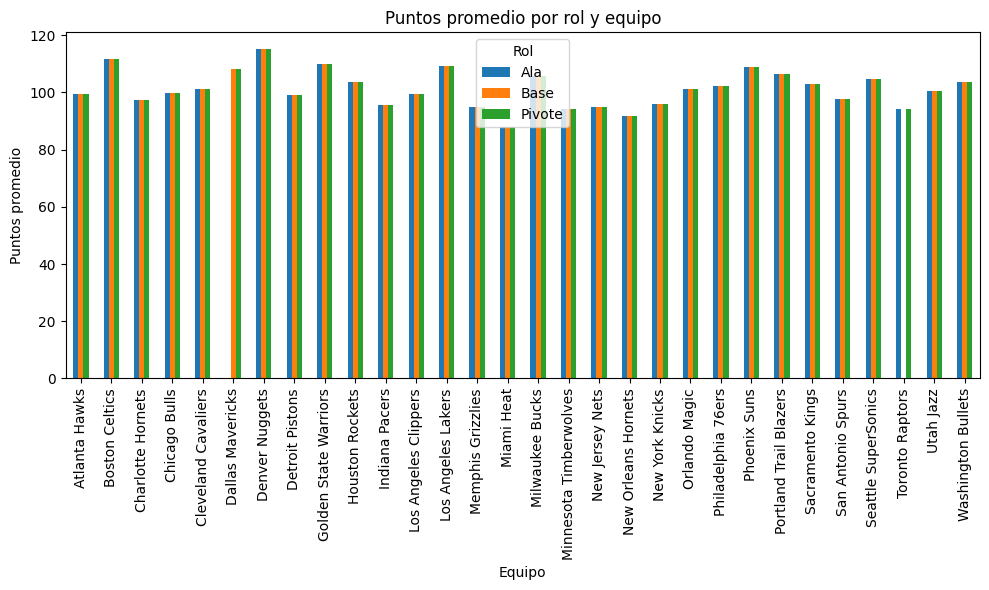

In [21]:
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

pivot_table_roles = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home'], columns=['role'], aggfunc='mean')
print(pivot_table_roles)

pivot_table_roles['pts_home'].plot(kind='bar', figsize=(10, 6))
plt.title('Puntos promedio por rol y equipo')
plt.xlabel('Equipo')
plt.ylabel('Puntos promedio')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [ ]:
# Crear una crosstab para analizar victorias por posición de los jugadores

# Mostrar el resultado de la crosstab


In [22]:
crosstab_result = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
crosstab_result

wl_home,L,W
position_y,,
C,546,1055
C-PF,170,271
PF,1192,2321
PF-C,341,699
PF-SF,136,270
PG,1160,2362
PG-SG,243,554
SF,860,1600
SF-PF,256,459


In [ ]:
# Gráfica para visualizar la pivot table


wl_home      L   W
position_y        
C-PF        10  10
PF-C         8  11
PG           3   5
SF          17  48
SF-PF        1   3
SG-PG        5  15


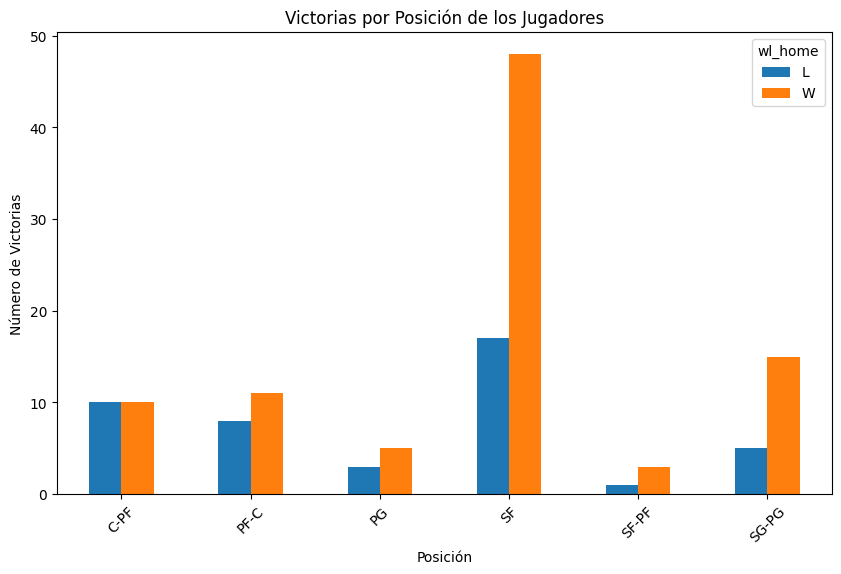

In [32]:
crosstab_wins_position = pd.crosstab(player_game_stats['position_y'], games_playoffs_df['wl_home'])
print(crosstab_wins_position)
crosstab_wins_position.plot(kind='bar', figsize=(10, 6))
plt.title('Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)
plt.show()

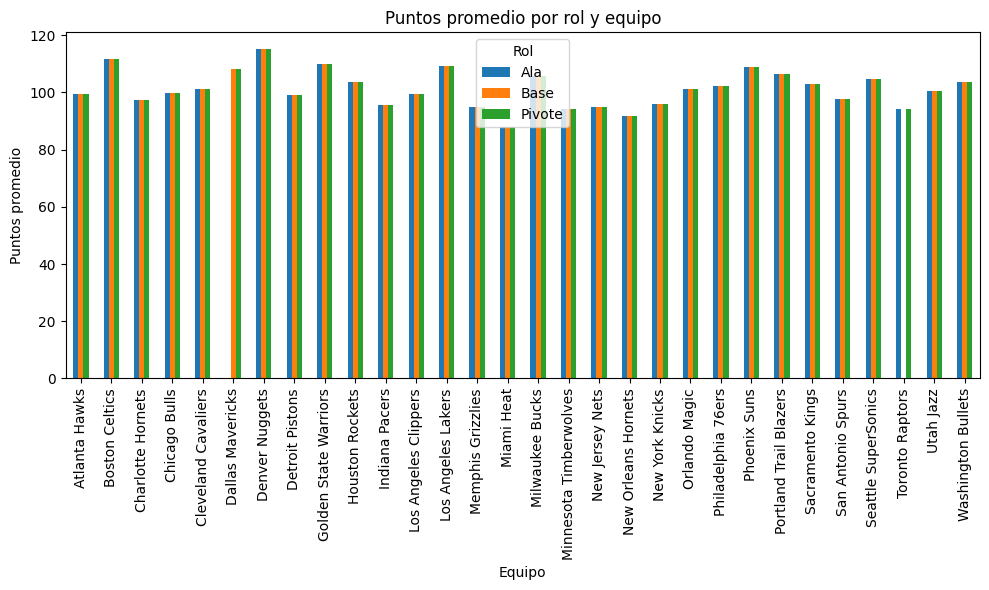

In [23]:
import matplotlib.pyplot as plt

pivot_table_roles['pts_home'].plot(kind='bar', figsize=(10, 6))
plt.title('Puntos promedio por rol y equipo')
plt.xlabel('Equipo')
plt.ylabel('Puntos promedio')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

In [ ]:
# Agrupar por temporada y calcular el promedio de puntos en casa

# Graficar la evolución del promedio de puntos por temporada


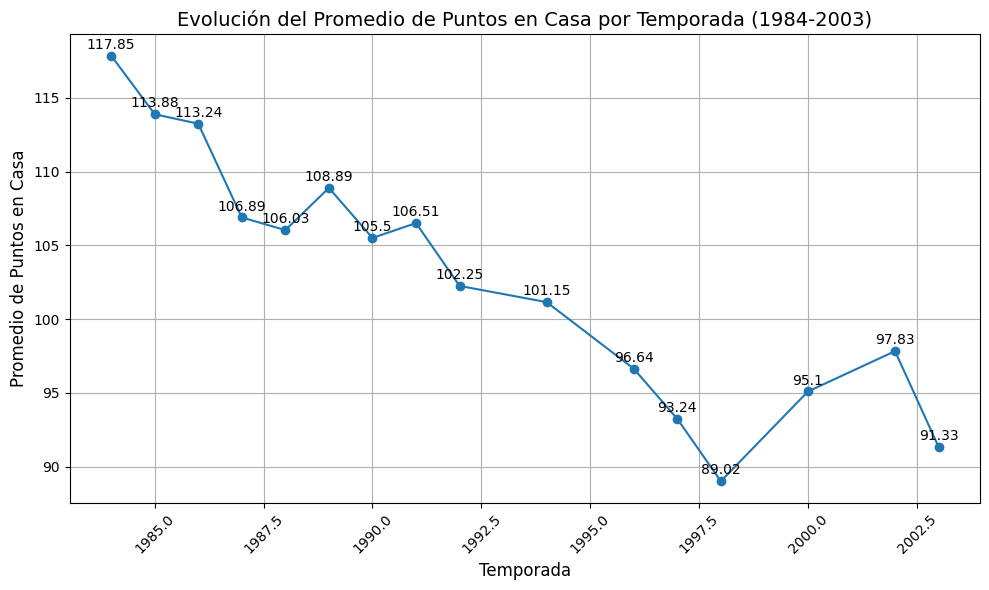

In [24]:
season_avg_points = games_playoffs_df.groupby('season_year')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(season_avg_points.index, season_avg_points.values, marker='o', linestyle='-')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Promedio de Puntos en Casa', fontsize=12)
plt.title('Evolución del Promedio de Puntos en Casa por Temporada (1984-2003)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, txt in enumerate(season_avg_points.values):
    plt.annotate(round(txt,2), (season_avg_points.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

In [ ]:
# Identificar el equipo con más puntos anotados en total

# Filtrar los datos para ese equipo y agrupar por temporada

# Graficar la evolución del rendimiento del equipo


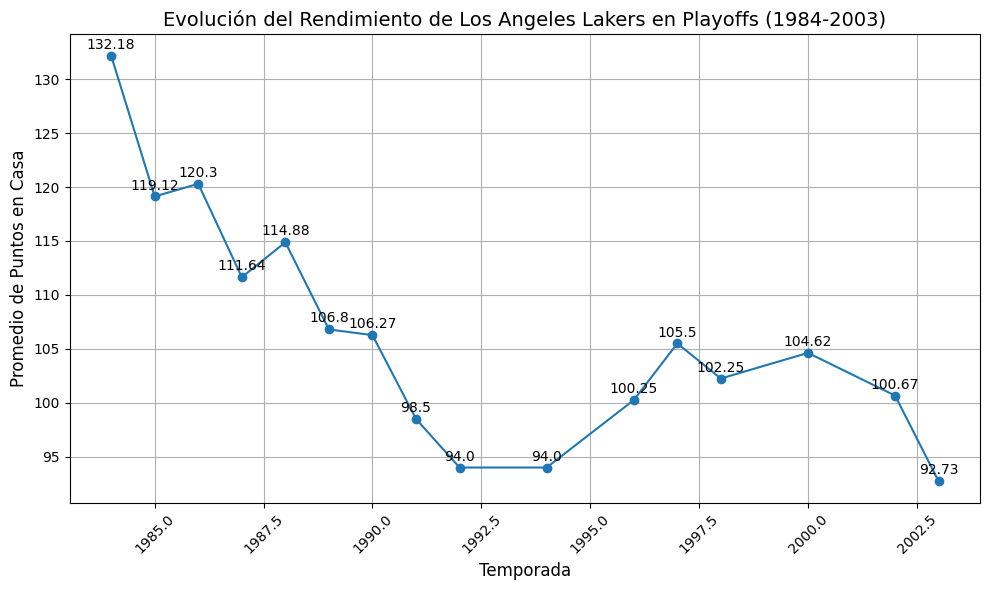

In [25]:
team_points = games_playoffs_df.groupby('team_name_home')['pts_home'].sum()
team_points_sorted = team_points.sort_values(ascending=False)
best_team = team_points_sorted.index[0]

best_team_performance = games_playoffs_df[games_playoffs_df['team_name_home'] == best_team].groupby('season_year')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(best_team_performance.index, best_team_performance.values, marker='o', linestyle='-')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Promedio de Puntos en Casa', fontsize=12)
plt.title(f'Evolución del Rendimiento de {best_team} en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, txt in enumerate(best_team_performance.values):
    plt.annotate(round(txt,2), (best_team_performance.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [ ]:
# Agrupar por jugador y sumar los puntos anotados

# Mostrar el jugador con más puntos anotados en los Playoffs


In [26]:
player_points = player_game_stats.groupby('person_id')['pts_home'].sum()

max_points_player = player_points.idxmax()
max_points = player_points.max()

print(f"El jugador con más puntos anotados en los Playoffs es el jugador con ID: {max_points_player}, con un total de {max_points} puntos.")

El jugador con más puntos anotados en los Playoffs es el jugador con ID: 1628959, con un total de 16784.0 puntos.


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

In [ ]:
# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar la evolución del rendimiento del jugador



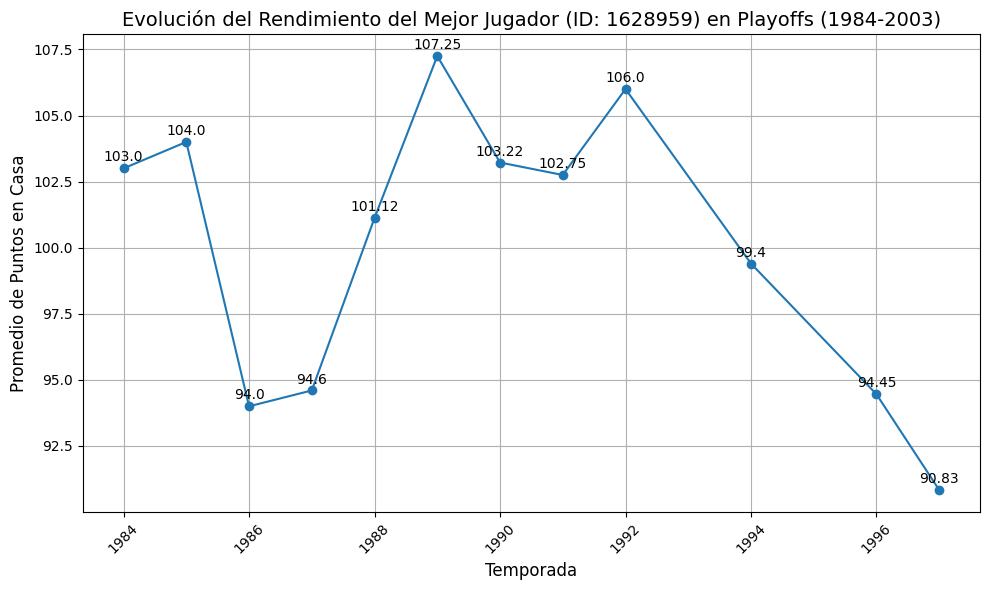

In [27]:
top_player_performance = player_game_stats[player_game_stats['person_id'] == max_points_player].groupby('season_year')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(top_player_performance.index, top_player_performance.values, marker='o', linestyle='-')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Promedio de Puntos en Casa', fontsize=12)
plt.title(f'Evolución del Rendimiento del Mejor Jugador (ID: {max_points_player}) en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, txt in enumerate(top_player_performance.values):
    plt.annotate(round(txt,2), (top_player_performance.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

In [ ]:
# Agrupar por jugador y calcular el promedio de puntos por partido

# Graficar los 10 jugadores con mejor promedio de puntos por partido


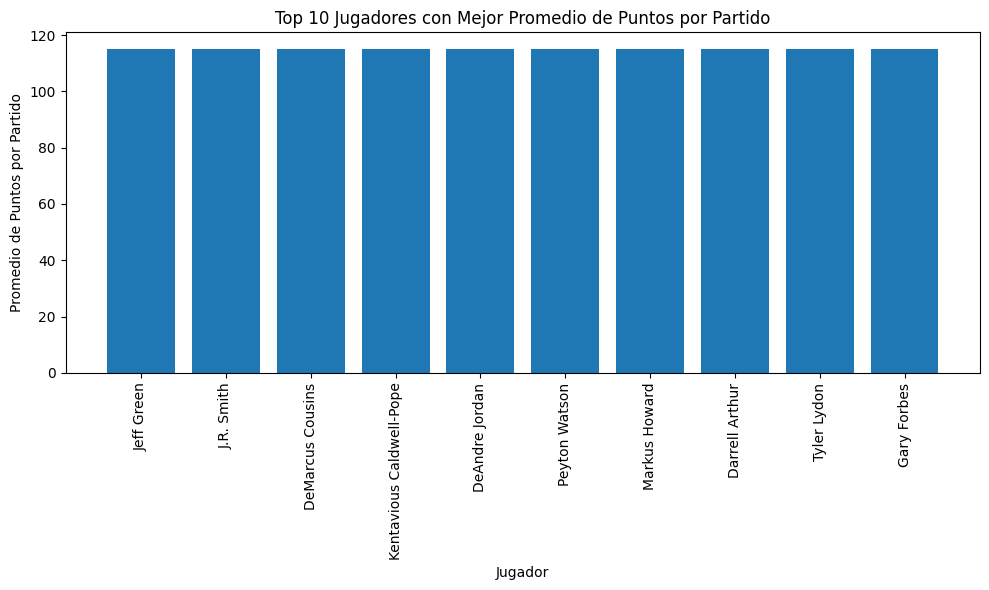

In [28]:
player_avg_points = player_game_stats.groupby('player_name')['pts_home'].mean()

player_avg_points_sorted = player_avg_points.sort_values(ascending=False)

top_10_players = player_avg_points_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_players.index, top_10_players.values)
plt.xlabel('Jugador')
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Jugadores con Mejor Promedio de Puntos por Partido')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

In [ ]:
# Especificar el ID del jugador que queremos analizar (puedes cambiar el ID)

# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar el rendimiento de ese jugador a lo largo de las temporadas



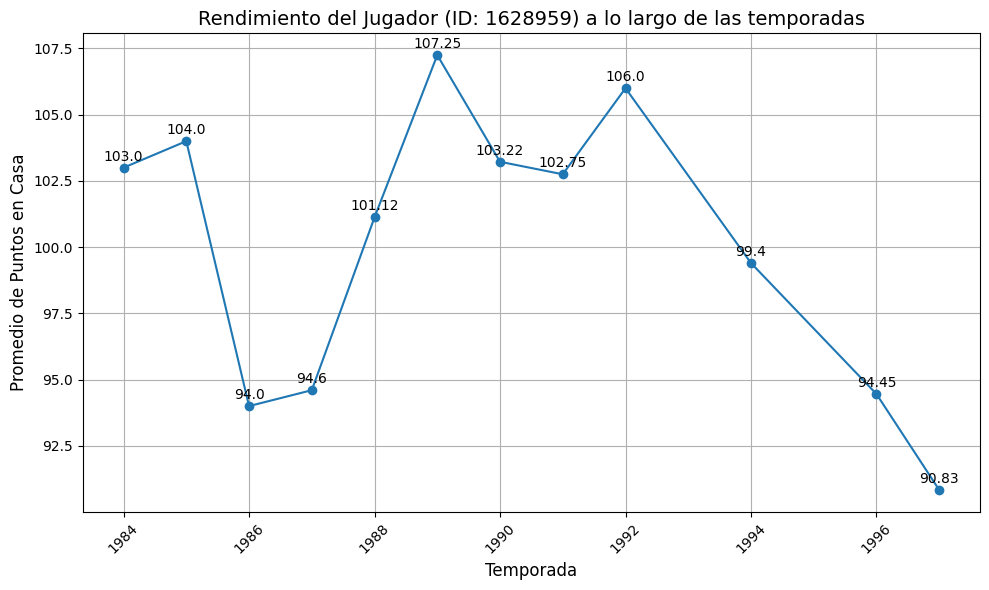

Nombre del jugador: Rawle Alkins


In [29]:
player_id_to_analyze = max_points_player

player_data = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]

player_performance_by_season = player_data.groupby('season_year')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(player_performance_by_season.index, player_performance_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Promedio de Puntos en Casa', fontsize=12)
plt.title(f'Rendimiento del Jugador (ID: {player_id_to_analyze}) a lo largo de las temporadas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


for i, txt in enumerate(player_performance_by_season.values):
    plt.annotate(round(txt,2), (player_performance_by_season.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

# Buscar el nombre del jugador
player_name = player_data[['first_name_x', 'last_name_x']].iloc[0]
print(f"Nombre del jugador: {player_name['first_name_x']} {player_name['last_name_x']}")

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

In [ ]:
# Agrupar por años de experiencia y calcular el promedio de puntos anotados

# Graficar la relación entre la experiencia y los puntos anotados



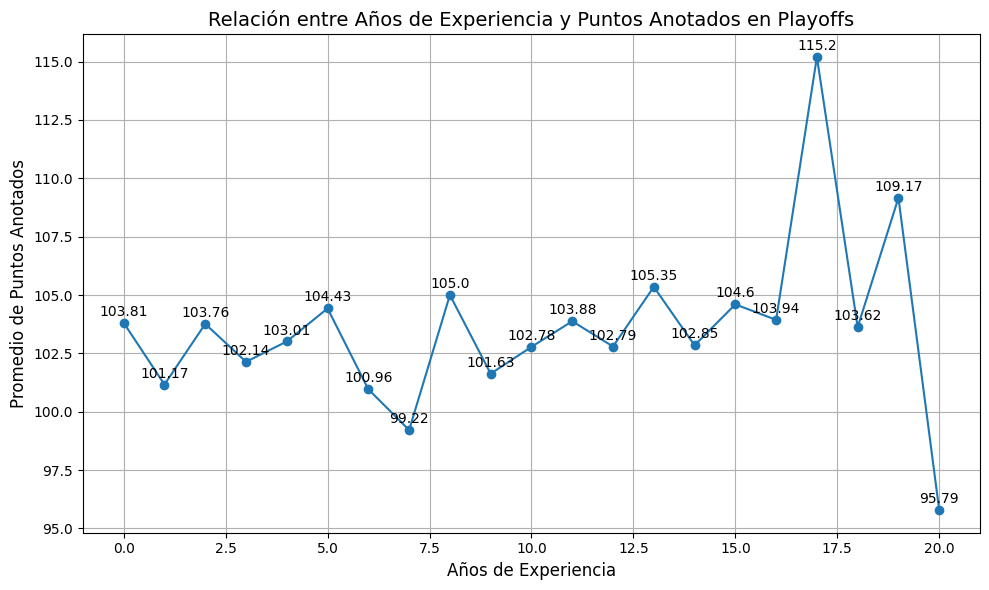

In [30]:
experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(experience_points.index, experience_points.values, marker='o', linestyle='-')
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Promedio de Puntos Anotados', fontsize=12)
plt.title('Relación entre Años de Experiencia y Puntos Anotados en Playoffs', fontsize=14)
plt.grid(True)

for i, txt in enumerate(experience_points.values):
    plt.annotate(round(txt,2), (experience_points.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

Cambios en la plantilla de jugadores:  La llegada o salida de jugadores clave puede afectar significativamente el rendimiento del equipo.

Estrategia y tácticas: La adaptación a las nuevas estrategias de juego de otros equipos y la implementación de nuevas tácticas propias influyen en los resultados.

Entrenador: La experiencia y capacidad del entrenador para motivar al equipo y adaptarse a las circunstancias es fundamental.

Lesiones:  Lesiones importantes en jugadores clave pueden afectar la cohesión y el rendimiento del equipo.

Rivalidad y otros factores externos: La rivalidad con equipos fuertes y otros factores externos, como la presión mediática, también puede afectar al rendimiento.


2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

Mantener la motivación y confianza:  Comunicación constante, reconociendo los logros.

Análisis detallado del juego: Identificar fortalezas y debilidades del jugador, así como de sus oponentes.

Adaptación de las estrategias de juego:  Ajustar jugadas para aprovechar las fortalezas del jugador.

Manejo de la presión:  Preparación mental para situaciones de alto estrés.

Condicionamiento físico:  Entrenamiento personalizado para optimizar su estado físico.

Descanso y recuperación:  Gestión adecuada del tiempo de juego para prevenir lesiones y fatiga.

Colaboración con el equipo médico:  Atención preventiva y tratamiento de posibles lesiones.

Fortalecimiento de la dinámica de equipo:  Fomentar un buen ambiente entre compañeros para un mejor rendimiento colectivo.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

La posición de los jugadores en el éxito de un equipo en los Playoffs es crucial.  Si bien todos los roles son importantes, ciertas posiciones tienden a tener un mayor impacto.

Bases (PG y SG): Su capacidad para dirigir el juego, crear oportunidades para otros jugadores, y controlar el ritmo del partido es fundamental.  Un base talentoso puede liderar ofensivamente, distribuir la pelota de manera efectiva y ser un defensor sólido, aspectos claves para las victorias.

Aleros (SF y PF): Jugadores versátiles que pueden aportar puntos, rebotes y defensas.  Un alero dominante puede ser una amenaza en ambos lados de la cancha, lo que hace que sea una posición muy valiosa.  Especialmente si se trata de un alero que puede encestar con facilidad.

Pívots (C): Su dominio en el área pintada es fundamental para el control de rebotes y para establecer la defensa.  Un pívot fuerte puede dominar el rebote ofensivo, proteger el aro y dominar la pintura.

No hay una posición singular que garantice la victoria, pero un equipo con un talentoso base, un alero dominante, y un pívot que domine el juego en el poste bajo, tendrá mayores probabilidades.  Es la combinación de habilidades en todas las posiciones la que determinará el éxito.

El análisis de las estadísticas, como puntos, rebotes, asistencias y eficiencia de tiro, por posición, pueden brindar información precisa.

El código proporcionado analiza el desempeño de los equipos y jugadores en los Playoffs, incluyendo el número de equipos participantes, jugadores, puntos anotados, y el rendimiento de los equipos a lo largo del tiempo. Con base en este tipo de análisis, se puede llegar a conclusiones estadísticas más objetivas sobre la influencia de cada rol en el éxito de un equipo.